In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn import linear_model
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

In [2]:
by_city = pd.read_csv('GlobalLandTemperaturesByCity.csv').astype({'dt':'datetime64','AverageTemperature':'float32', \
                                    'AverageTemperatureUncertainty':'float32'}).rename(columns={'dt':'Date'})                                    
by_city['Year']= by_city['Date'].dt.year
by_city['Month']= by_city['Date'].dt.month
by_city = by_city.astype({'Year':'int32','Month':'int32'})
by_city.head(3)

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743,11
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1743,12
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744,1


In [5]:
by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv').astype({'dt':'datetime64','AverageTemperature':'float32', \
                                    'AverageTemperatureUncertainty':'float32'}).rename(columns={'dt':'Date'})
                                    
by_country['Year']= by_country['Date'].dt.year
by_country['Month']= by_country['Date'].dt.month
by_country = by_country.astype({'Year':'int32','Month':'int32'})
by_country.head(3)

,Date,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month
0,1743-11-01,4.384,2.294,Åland,1743,11
1,1743-12-01,NaN,NaN,Åland,1743,12
2,1744-01-01,NaN,NaN,Åland,1744,1


In [6]:
globaltemp_df = pd.read_csv("GlobalTemperatures.csv").astype({'dt':'datetime64'}).rename(columns={'dt':'Date'})
globaltemp_df['Year']= globaltemp_df['Date'].dt.year
globaltemp_df['Month']= globaltemp_df['Date'].dt.month
globaltemp_df.head(3)

,Date,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3


In [10]:
df_fuel = pd.read_csv("annual-change-fossil-fuels-coal-gas-oil.csv")
df_fuel.rename(columns = {'Entity':'Country', 'Fossil.fuels..TWh.growth...sub.method.':'FossilFuelGrowth', 
                      'Coal..TWh.growth...sub.method.':'CoalGrowth', 'Gas..TWh.growth...sub.method.':'GasGrowth',
                     'Oil..TWh.growth...sub.method.':'OilGrowth'}, inplace = True)
df_fuel.head(3)

,Code,Year,Country,FossilFuelGrowth,CoalGrowth,GasGrowth,OilGrowth,region,sub.region
0,ARE,1977,United Arab Emirates,19.441,0.000,14.040,5.401,Asia,Western Asia
1,ARE,1978,United Arab Emirates,7.680,0.000,6.143,1.537,Asia,Western Asia
2,ARE,2006,United Arab Emirates,36.862,1.584,12.773,22.506,Asia,Western Asia


In [11]:
natural_resources = pd.read_csv("natural-resources.csv").rename(columns={'Entity':'Country'})
natural_resources = natural_resources[["Year","Country","Population","Gas consumption","Coal consumption","Oil consumption"]]
natural_resources.head(3)

,Year,Country,Population,Gas consumption,Coal consumption,Oil consumption
0,1980,Afghanistan,13360000.0,56640000.0,119000.0,406500.0
1,1981,Afghanistan,13170000.0,84960000.0,125000.0,464600.0
2,1982,Afghanistan,12880000.0,141600000.0,145000.0,452900.0


In [12]:
df_fuel = df_fuel.merge(by_country,on=["Country","Year"]).reset_index().merge(natural_resources,on=['Year','Country'])
df_fuel.head(3)

,index,Code,Year,Country,FossilFuelGrowth,CoalGrowth,GasGrowth,OilGrowth,region,sub.region,Date,AverageTemperature,AverageTemperatureUncertainty,Month,Population,Gas consumption,Coal consumption,Oil consumption
0,0,ARE,1977,United Arab Emirates,19.441,0.0,14.04,5.401,Asia,Western Asia,1977-01-01,17.583,0.445,1,735300.0,NaN,NaN,NaN
1,1,ARE,1977,United Arab Emirates,19.441,0.0,14.04,5.401,Asia,Western Asia,1977-02-01,20.843,0.535,2,735300.0,NaN,NaN,NaN
2,2,ARE,1977,United Arab Emirates,19.441,0.0,14.04,5.401,Asia,Western Asia,1977-03-01,26.038,0.662,3,735300.0,NaN,NaN,NaN


In [20]:
df = df_fuel.drop('index',axis=1)[["Year","Country","Code","Population","Date","Month", \
                                   "Gas consumption","Coal consumption","Oil consumption","FossilFuelGrowth","CoalGrowth", \
                                  "GasGrowth","OilGrowth","region","AverageTemperature","AverageTemperatureUncertainty"]]
df = df.merge(by_country,on=['Year','Month','Country','AverageTemperature','AverageTemperatureUncertainty']).dropna().groupby(['Year','Country']).mean().drop("Month",axis=1).reset_index()
df.head(5)

,Year,Country,Population,Gas consumption,Coal consumption,Oil consumption,FossilFuelGrowth,CoalGrowth,GasGrowth,OilGrowth,AverageTemperature,AverageTemperatureUncertainty
0,1980,Algeria,19220000.0,1.303000e+10,92870.0,7026000.0,28.703,-0.093,27.913,0.884,23.160166,0.382917
1,1980,Argentina,27900000.0,1.017000e+10,1360000.0,30850000.0,-11.909,-1.357,9.239,-19.790,15.226917,0.171250
2,1980,Australia,14590000.0,9.119000e+09,67360000.0,34520000.0,7.890,9.222,14.291,-15.622,22.586166,0.171833
3,1980,Austria,7610000.0,5.268000e+09,6148000.0,13480000.0,-4.339,1.149,-1.966,-3.521,5.633584,0.242250
4,1980,Bangladesh,79640000.0,1.416000e+09,23500.0,1858000.0,4.123,0.363,1.582,2.179,25.340668,0.281667


In [22]:
model_df = pd.DataFrame()
for country in df.Country.unique():
    mydf = df.query("Country == '"+country+"'")
    mydf['TempMinus1'] = mydf.shift(1)['AverageTemperature']
    mydf['TempMinus2'] = mydf.shift(2)['AverageTemperature']
    mydf['TempMinus5'] = mydf.shift(5)['AverageTemperature']
    model_df = pd.concat([model_df,mydf])
model_df

,Year,Country,Population,Gas consumption,Coal consumption,Oil consumption,FossilFuelGrowth,CoalGrowth,GasGrowth,OilGrowth,AverageTemperature,AverageTemperatureUncertainty,TempMinus1,TempMinus2,TempMinus5
0,1980,Algeria,19220000.0,1.303000e+10,92870.0,7026000.0,28.703,-0.093,27.913,0.884,23.160166,0.382917,NaN,NaN,NaN
62,1981,Algeria,19820000.0,9.799000e+09,279100.0,7375000.0,37.721,-0.221,32.821,5.121,23.579250,0.359833,23.160166,NaN,NaN
124,1982,Algeria,20450000.0,1.566000e+10,746000.0,8304000.0,32.592,9.188,19.154,4.250,23.094168,0.342417,23.579250,23.160166,NaN
186,1983,Algeria,21100000.0,1.858000e+10,1210000.0,7898000.0,23.576,-1.047,15.304,9.319,23.683001,0.333000,23.094168,23.579250,NaN
248,1984,Algeria,21760000.0,1.926000e+10,1247000.0,8710000.0,-11.412,0.942,-21.464,9.110,23.063084,0.373667,23.683001,23.094168,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,2009,Slovakia,5401000.0,5.398000e+09,7593000.0,4677000.0,-12.596,-1.211,-8.617,-2.768,9.001667,0.287833,9.397417,9.478917,8.145583
2169,2010,Slovakia,5404000.0,6.100000e+09,7214000.0,4855000.0,9.081,0.243,6.757,2.080,8.073000,0.274000,9.001667,9.397417,7.936917
2245,2011,Slovakia,5409000.0,5.631000e+09,7209000.0,4818000.0,-8.171,-2.329,-4.296,-1.547,8.846000,0.321583,8.073000,9.001667,8.528334
2321,2012,Slovakia,5415000.0,5.290000e+09,6893000.0,4417000.0,-8.020,-2.417,-3.160,-2.442,8.873167,0.390667,8.846000,8.073000,9.478917


In [23]:
model_df.to_csv("YearlyByCountry.csv")

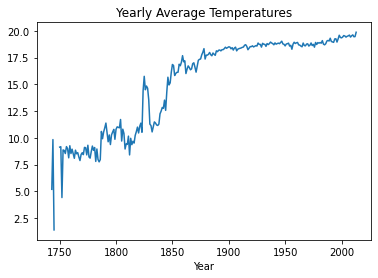

In [37]:
by_country.groupby('Year').mean()['AverageTemperature'].plot()
plt.title('Yearly Average Temperatures')
plt.show()

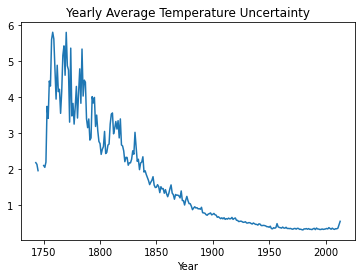

In [36]:
by_country.groupby('Year').mean()['AverageTemperatureUncertainty'].plot()
plt.title('Yearly Average Temperature Uncertainty')
plt.show()

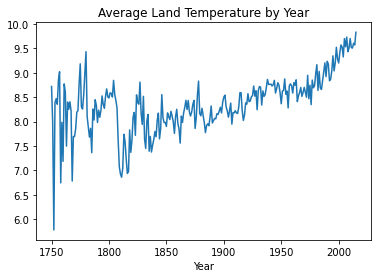

In [38]:
globaltemp_df.groupby('Year').mean()['LandAverageTemperature'].plot()
plt.title('Average Land Temperature by Year')
plt.show()

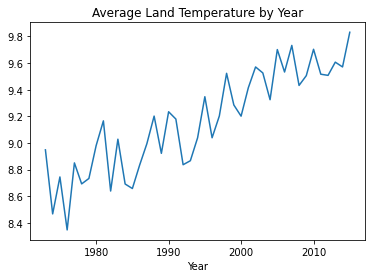

In [39]:
globaltemp_df.query('Year >= 1973').groupby('Year').mean()['LandAverageTemperature'].plot()
plt.title('Average Land Temperature by Year')
plt.show()

In [49]:
data_columns = ['Year',
 'Population',
 'Gas consumption',
 'Coal consumption',
 'Oil consumption',
 'FossilFuelGrowth',
 'CoalGrowth',
 'GasGrowth',
 'OilGrowth',
 'AverageTemperature',
 'TempMinus1',
 'TempMinus2',
 'TempMinus5']


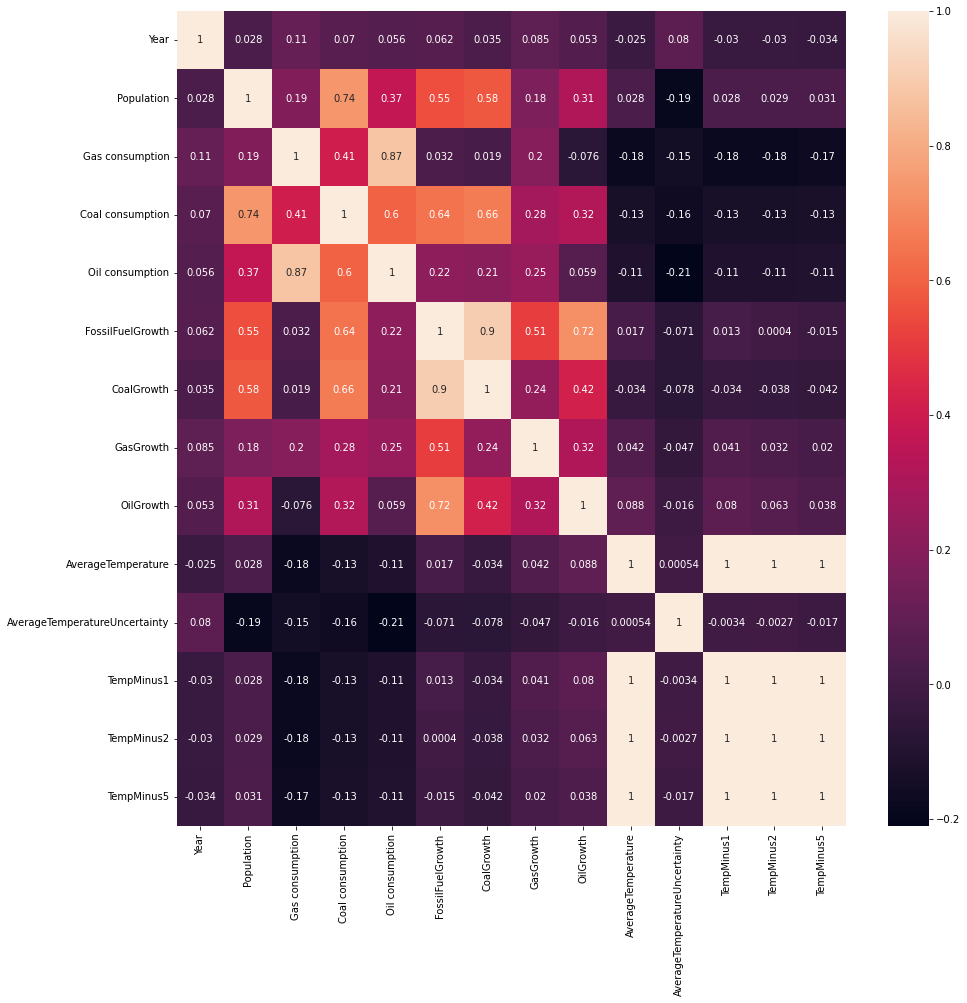

In [52]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
ax = sns.heatmap(model_df[data_columns].corr(), annot=True)

<Figure size 1440x1440 with 0 Axes>

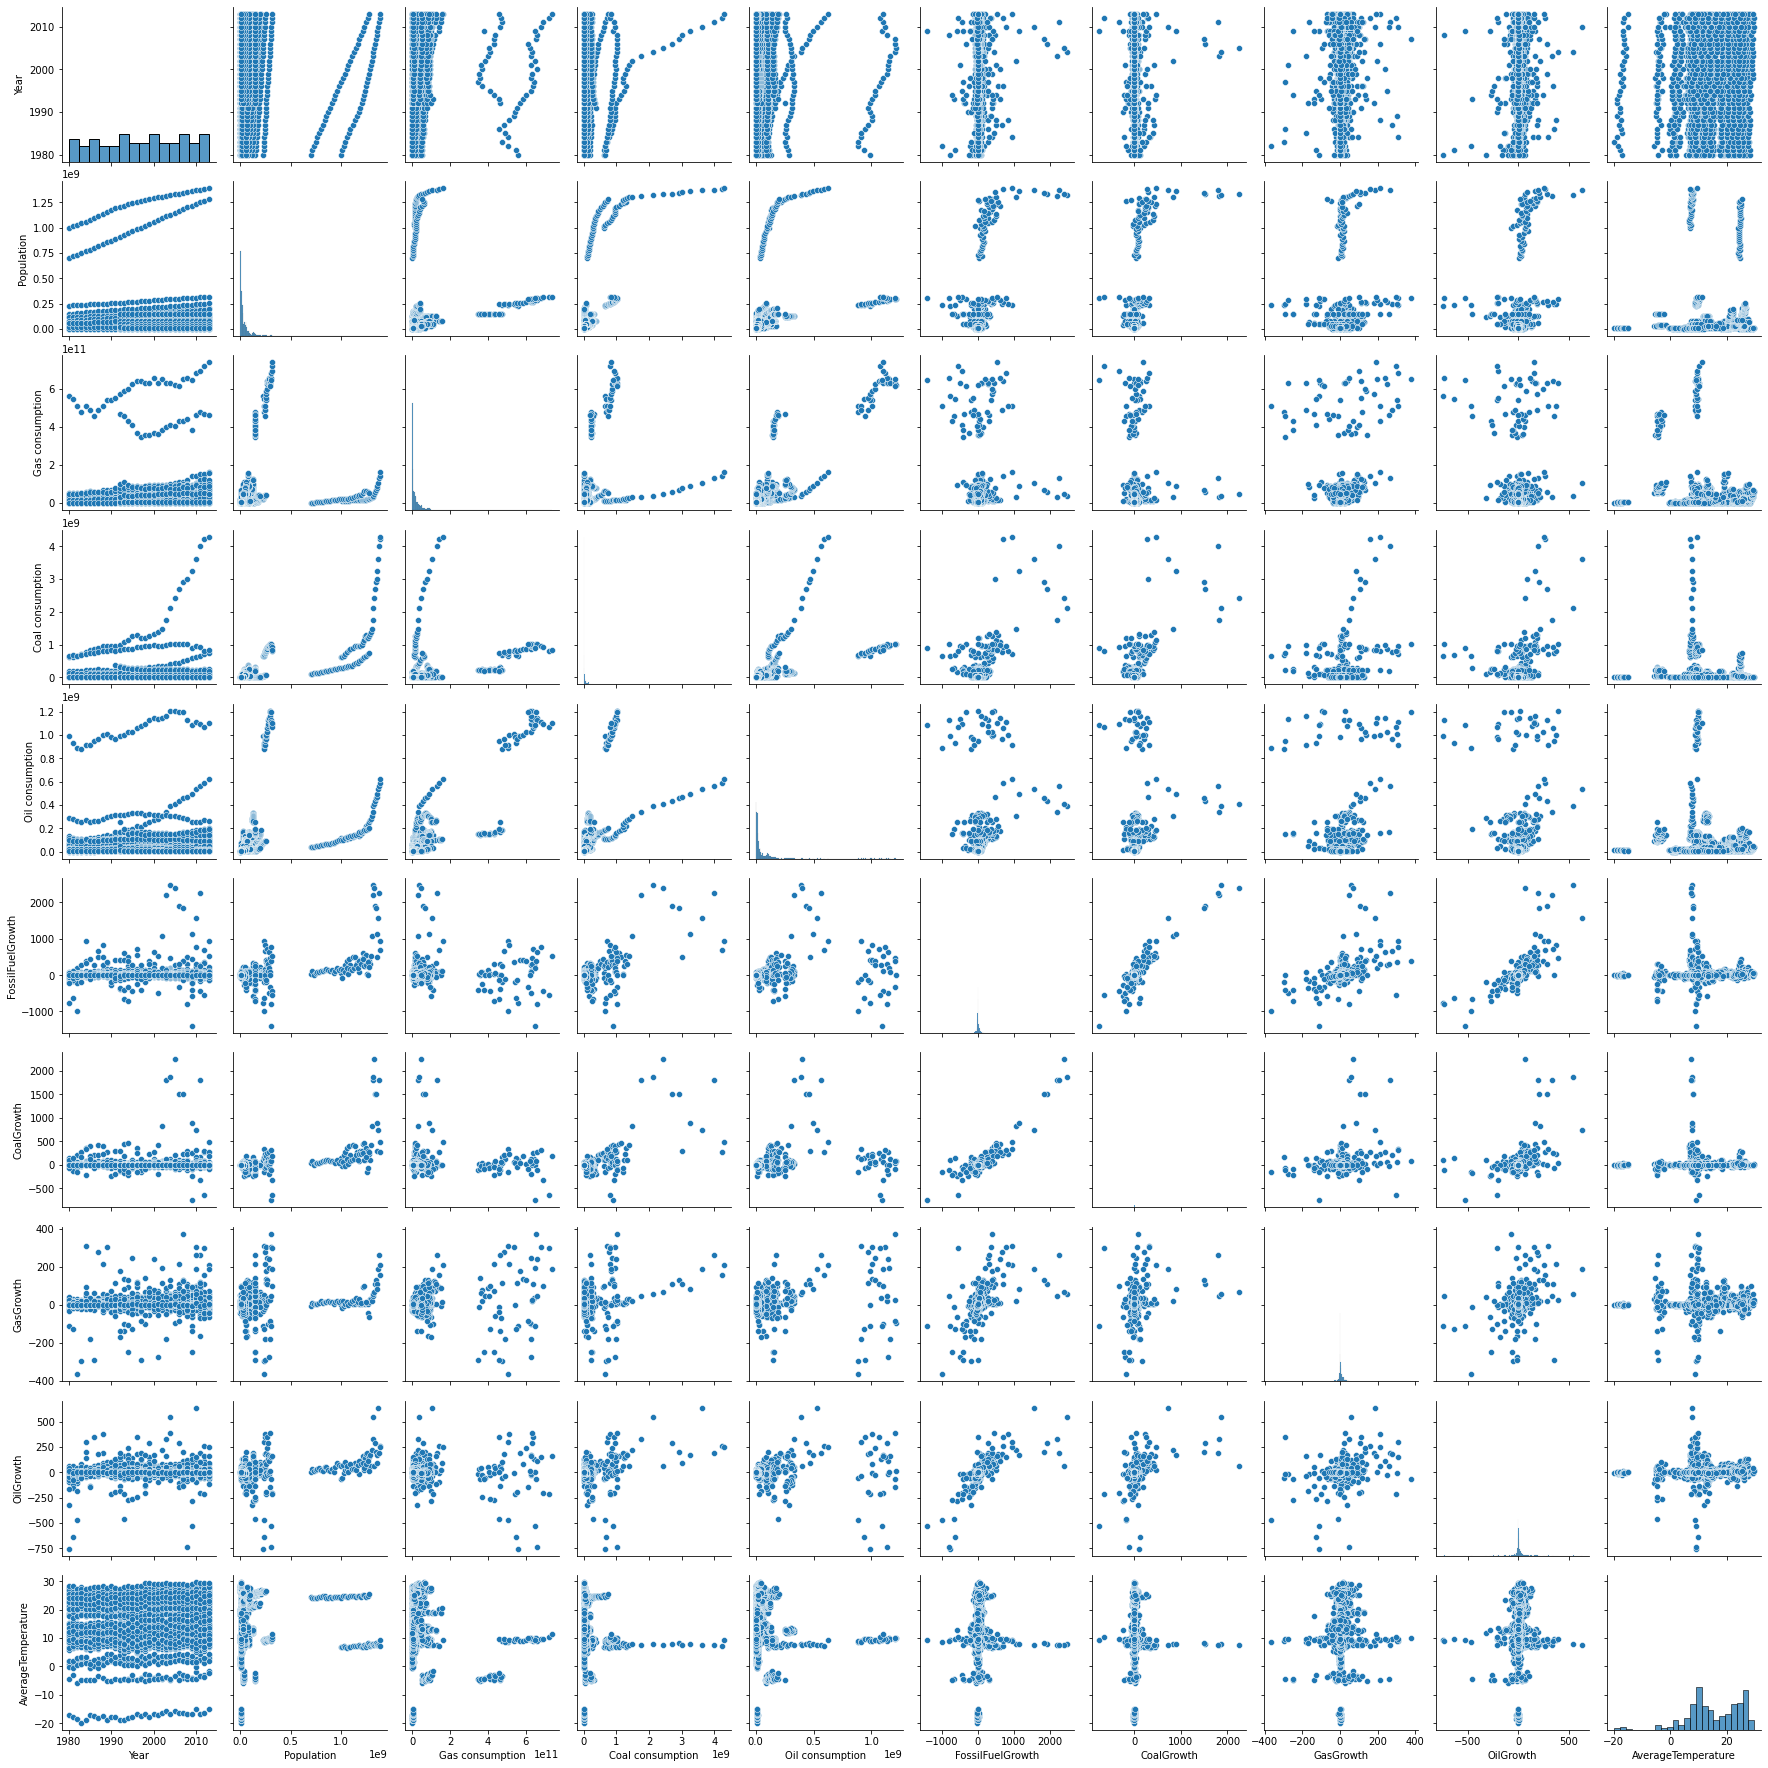

In [55]:
data_columns = ['Year',
 'Population',
 'Gas consumption',
 'Coal consumption',
 'Oil consumption',
 'FossilFuelGrowth',
 'CoalGrowth',
 'GasGrowth',
 'OilGrowth',
 'AverageTemperature']
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
g = sns.pairplot(model_df[data_columns])

In [56]:
model_df

,Year,Country,Population,Gas consumption,Coal consumption,Oil consumption,FossilFuelGrowth,CoalGrowth,GasGrowth,OilGrowth,AverageTemperature,AverageTemperatureUncertainty,TempMinus1,TempMinus2,TempMinus5
0,1980,Algeria,19220000.0,1.303000e+10,92870.0,7026000.0,28.703,-0.093,27.913,0.884,23.160166,0.382917,NaN,NaN,NaN
62,1981,Algeria,19820000.0,9.799000e+09,279100.0,7375000.0,37.721,-0.221,32.821,5.121,23.579250,0.359833,23.160166,NaN,NaN
124,1982,Algeria,20450000.0,1.566000e+10,746000.0,8304000.0,32.592,9.188,19.154,4.250,23.094168,0.342417,23.579250,23.160166,NaN
186,1983,Algeria,21100000.0,1.858000e+10,1210000.0,7898000.0,23.576,-1.047,15.304,9.319,23.683001,0.333000,23.094168,23.579250,NaN
248,1984,Algeria,21760000.0,1.926000e+10,1247000.0,8710000.0,-11.412,0.942,-21.464,9.110,23.063084,0.373667,23.683001,23.094168,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,2009,Slovakia,5401000.0,5.398000e+09,7593000.0,4677000.0,-12.596,-1.211,-8.617,-2.768,9.001667,0.287833,9.397417,9.478917,8.145583
2169,2010,Slovakia,5404000.0,6.100000e+09,7214000.0,4855000.0,9.081,0.243,6.757,2.080,8.073000,0.274000,9.001667,9.397417,7.936917
2245,2011,Slovakia,5409000.0,5.631000e+09,7209000.0,4818000.0,-8.171,-2.329,-4.296,-1.547,8.846000,0.321583,8.073000,9.001667,8.528334
2321,2012,Slovakia,5415000.0,5.290000e+09,6893000.0,4417000.0,-8.020,-2.417,-3.160,-2.442,8.873167,0.390667,8.846000,8.073000,9.478917


In [61]:
yearly_avg = model_df.set_index("Year").groupby("Year").mean()
yearly_avg['Gas consumption'] = model_df.groupby(['Year','Country'])['Gas consumption'].mean().groupby('Year').sum()
yearly_avg['Coal consumption'] = model_df.groupby(['Year','Country'])['Coal consumption'].mean().groupby('Year').sum()
yearly_avg['Oil consumption'] = model_df.groupby(['Year','Country'])['Oil consumption'].mean().groupby('Year').sum()
yearly_avg['FossilFuelGrowth'] = model_df.groupby(['Year','Country'])['FossilFuelGrowth'].mean().groupby('Year').sum()
yearly_avg['CoalGrowth'] = model_df.groupby(['Year','Country'])['CoalGrowth'].mean().groupby('Year').sum()
yearly_avg['GasGrowth'] = model_df.groupby(['Year','Country'])['GasGrowth'].mean().groupby('Year').sum()
yearly_avg['OilGrowth'] = model_df.groupby(['Year','Country'])['OilGrowth'].mean().groupby('Year').sum()
yearly_avg['Population'] = model_df.groupby(['Year','Country'])['Population'].mean().groupby('Year').sum()
yearly_avg['log_Gas'] = np.log(yearly_avg['Gas consumption'])
yearly_avg['log_Coal'] = np.log(yearly_avg['Coal consumption'])
yearly_avg['log_Oil'] = np.log(yearly_avg['Oil consumption'])
yearly_avg = yearly_avg
global_temps = globaltemp_df.groupby('Year').mean().reset_index().query("Year >= 1973").drop("Month",axis=1)
yearly_avg = yearly_avg.merge(global_temps,on="Year")
yearly_avg['TempMinus1'] = yearly_avg.shift(1)['AverageTemperature']
yearly_avg['TempMinus2'] = yearly_avg.shift(2)['AverageTemperature']
yearly_avg['TempMinus5'] = yearly_avg.shift(5)['AverageTemperature']
yearly_avg

,Year,Population,Gas consumption,Coal consumption,Oil consumption,FossilFuelGrowth,CoalGrowth,GasGrowth,OilGrowth,AverageTemperature,AverageTemperatureUncertainty,TempMinus1,TempMinus2,TempMinus5,log_Gas,log_Coal,log_Oil,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1980,3.520742e+09,1.019004e+12,2.315429e+09,2.803656e+09,-937.510,568.843,15.456,-1521.806,15.964849,0.271722,NaN,NaN,NaN,27.649847,21.562861,21.754190,8.980333,0.106667,14.672917,0.152583,3.404667,0.150083,15.491833,0.053667
1,1981,3.583076e+09,1.007001e+12,2.364802e+09,2.693236e+09,-955.931,264.405,-49.198,-1171.134,16.058908,0.296235,15.964849,NaN,NaN,27.637998,21.583960,21.714009,9.165833,0.087250,14.855167,0.138917,3.635917,0.147417,15.516167,0.052333
2,1982,3.646517e+09,9.846384e+11,2.432822e+09,2.615005e+09,-979.571,185.496,-230.437,-934.624,15.986446,0.291190,16.058908,15.964849,NaN,27.615540,21.612318,21.684532,8.639167,0.082667,14.300917,0.171000,3.239917,0.207083,15.341917,0.054750
3,1983,3.710594e+09,9.717523e+11,2.541397e+09,2.584809e+09,311.553,551.937,-118.796,-121.585,16.111572,0.293034,15.986446,16.058908,NaN,27.602367,21.655980,21.672917,9.028167,0.094000,14.679833,0.114667,3.552417,0.124250,15.520250,0.055833
4,1984,3.777334e+09,1.057065e+12,2.702477e+09,2.648520e+09,2399.844,895.197,735.751,768.904,15.865528,0.284383,16.111572,15.986446,NaN,27.686517,21.717435,21.697267,8.691833,0.102583,14.342667,0.134083,3.186750,0.130333,15.344167,0.057167
5,1985,3.846210e+09,1.073513e+12,2.864156e+09,2.653958e+09,968.970,970.534,61.939,-63.502,15.837643,0.294676,15.865528,16.111572,15.964849,27.701958,21.775540,21.699318,8.658000,0.093250,14.267167,0.119667,3.175667,0.105417,15.340667,0.053917
6,1986,3.916121e+09,1.064809e+12,2.912023e+09,2.743547e+09,1157.716,276.564,-36.092,917.241,15.936502,0.276534,15.837643,15.865528,16.058908,27.693816,21.792114,21.732517,8.833583,0.085000,14.516833,0.120500,3.319333,0.128250,15.384000,0.053250
7,1987,3.988083e+09,1.117415e+12,3.057346e+09,2.816492e+09,2121.008,935.856,526.132,659.019,16.171337,0.262723,15.936502,15.837643,15.986446,27.742039,21.840813,21.758758,8.994417,0.085167,14.699833,0.110750,3.431417,0.144583,15.524500,0.053333
8,1988,4.060976e+09,1.166109e+12,3.183592e+09,2.927792e+09,2552.947,836.316,483.658,1232.973,16.276457,0.252774,16.171337,15.936502,16.111572,27.784693,21.881276,21.797515,9.201583,0.080083,14.890000,0.133667,3.654000,0.111500,15.555750,0.053250
9,1989,4.131563e+09,1.233739e+12,3.218606e+09,3.002605e+09,1736.035,440.454,607.512,688.065,16.317383,0.283368,16.276457,16.171337,15.865528,27.841071,21.892214,21.822746,8.922000,0.088000,14.621500,0.111833,3.334333,0.129167,15.441583,0.055917


In [62]:
yearly_avg.to_csv("GlobalYearly.csv")